# Data cleaning

## 1. Import and explore data

In [1]:
#import the appropriate packages
import plotly_express as px
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, roc_auc_score
import pandas as pd
import numpy as np

In [2]:
# Read in data and split data to be used in the models
columns = ['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Ascore',
       'Cscore', 'Impulsive', 'SS', 'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke',
       'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA']
drugs = pd.read_csv('drug_consumption.data', names = columns)

In [3]:
drugs.head(20)

ID      Age   Gender  Education  Country  Ethnicity   Nscore   Escore  \
0    1  0.49788  0.48246   -0.05921  0.96082    0.12600  0.31287 -0.57545   
1    2 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886   
2    3  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523   
3    4 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615   
4    5  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340   
5    6  2.59171  0.48246   -1.22751  0.24923   -0.31685 -0.67825 -0.30033   
6    7  1.09449 -0.48246    1.16365 -0.57009   -0.31685 -0.46725 -1.09207   
7    8  0.49788 -0.48246   -1.73790  0.96082   -0.31685 -1.32828  1.93886   
8    9  0.49788  0.48246   -0.05921  0.24923   -0.31685  0.62967  2.57309   
9   10  1.82213 -0.48246    1.16365  0.96082   -0.31685 -0.24649  0.00332   
10  11 -0.07854  0.48246    0.45468  0.96082   -0.31685 -1.05308  0.80523   
11  12  1.09449 -0.48246   -0.61113 -0.28519   -0.31685 -1.32828  0.00332   
12  13  1.82213  0.48246    0.45468  0.96082   -0.31685  2.28554  0.16767   
13  14  1.82213  0.48246   -0.05921  0.24923   -0.31685 -0.79151  0.80523   
14  15  1.82213  0.48246   -0.05921  0.96082   -0.31685 -0.92104  1.45421   
15  16  1.82213 -0.48246    0.45468  0.96082   -0.31685 -2.05048 -1.50796   
16  17  0.49788  0.48246   -0.61113  0.96082   -0.31685 -1.55078 -0.80615   
17  18  1.09449 -0.48246   -1.73790  0.96082   -0.31685  0.52135 -1.23177   
18  19  1.82213 -0.48246    0.45468 -0.09765   -0.31685  1.37297 -0.15487   
19  20  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.34799 -1.76250   

     Oscore   Ascore  ...  Ecstasy  Heroin  Ketamine Legalh  LSD Meth  \
0  -0.58331 -0.91699  ...      CL0     CL0       CL0    CL0  CL0  CL0   
1   1.43533  0.76096  ...      CL4     CL0       CL2    CL0  CL2  CL3   
2  -0.84732 -1.62090  ...      CL0     CL0       CL0    CL0  CL0  CL0   
3  -0.01928  0.59042  ...      CL0     CL0       CL2    CL0  CL0  CL0   
4  -0.45174 -0.30172  ...      CL1     CL0       CL0    CL1  CL0  CL0   
5  -1.55521  2.03972  ...      CL0     CL0       CL0    CL0  CL0  CL0   
6  -0.45174 -0.30172  ...      CL0     CL0       CL0    CL0  CL0  CL0   
7  -0.84732 -0.30172  ...      CL0     CL0       CL0    CL0  CL0  CL0   
8  -0.97631  0.76096  ...      CL0     CL0       CL0    CL0  CL0  CL0   
9  -1.42424  0.59042  ...      CL0     CL0       CL0    CL0  CL0  CL0   
10 -1.11902 -0.76096  ...      CL0     CL0       CL0    CL0  CL0  CL0   
11  0.14143 -1.92595  ...      CL3     CL0       CL0    CL0  CL1  CL0   
12  0.44585 -1.62090  ...      CL0     CL0       CL0    CL0  CL1  CL1   
13 -0.01928  0.94156  ...      CL0     CL0       CL0    CL0  CL0  CL0   
14  0.44585 -0.60633  ...      CL0     CL0       CL0    CL0  CL0  CL0   
15 -1.55521 -1.07533  ...      CL1     CL0       CL0    CL0  CL0  CL0   
16 -1.68062  0.28783  ...      CL0     CL0       CL0    CL0  CL0  CL0   
17 -0.31776 -0.45321  ...      CL1     CL0       CL2    CL0  CL1  CL0   
18 -0.17779 -1.92595  ...      CL2     CL0       CL0    CL2  CL1  CL0   
19 -2.39883 -1.92595  ...      CL1     CL0       CL0    CL0  CL0  CL6   

   Mushrooms Nicotine Semer  VSA  
0        CL0      CL2   CL0  CL0  
1        CL0      CL4   CL0  CL0  
2        CL1      CL0   CL0  CL0  
3        CL0      CL2   CL0  CL0  
4        CL2      CL2   CL0  CL0  
5        CL0      CL6   CL0  CL0  
6        CL0      CL6   CL0  CL0  
7        CL0      CL0   CL0  CL0  
8        CL0      CL6   CL0  CL0  
9        CL0      CL6   CL0  CL0  
10       CL0      CL2   CL0  CL1  
11       CL2      CL6   CL0  CL0  
12       CL1      CL6   CL0  CL0  
13       CL0      CL1   CL0  CL0  
14       CL0      CL6   CL0  CL0  
15       CL0      CL0   CL0  CL0  
16       CL0      CL6   CL0  CL0  
17       CL1      CL6   CL0  CL0  
18       CL1      CL0   CL0  CL0  
19       CL0      CL1   CL0  CL0  

[20 rows x 32 columns]

This part of the analysis also involved looking at the underlying study, its assumptions and methodologies.

https://arxiv.org/pdf/1506.06297.pdf

* CL0 Never Used 428 22.71% 1877 99.58% 1455 77.19% 
* CL1 Used over a Decade Ago 193 10.24% 2 0.11% 200 10.61% 
* CL2 Used in Last Decade 204 10.82% 3 0.16% 135 7.16% 
* CL3 Used in Last Year 185 9.81% 2 0.11% 61 3.24% 
* CL4 Used in Last Month 108 5.73% 1 0.05% 13 0.69% 
* CL5 Used in Last Week 157 8.33% 0 0.00% 14 0.74% 
* CL6 Used in Last Day 610 32.36% 0 0.00% 7 0.37% 

In [4]:
# https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29#
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
ID           1885 non-null int64
Age          1885 non-null float64
Gender       1885 non-null float64
Education    1885 non-null float64
Country      1885 non-null float64
Ethnicity    1885 non-null float64
Nscore       1885 non-null float64
Escore       1885 non-null float64
Oscore       1885 non-null float64
Ascore       1885 non-null float64
Cscore       1885 non-null float64
Impulsive    1885 non-null float64
SS           1885 non-null float64
Alcohol      1885 non-null object
Amphet       1885 non-null object
Amyl         1885 non-null object
Benzos       1885 non-null object
Caff         1885 non-null object
Cannabis     1885 non-null object
Choc         1885 non-null object
Coke         1885 non-null object
Crack        1885 non-null object
Ecstasy      1885 non-null object
Heroin       1885 non-null object
Ketamine     1885 non-null object
Legalh       1885 non-null objec

In [5]:
# split out the drugs and substances to look at them more easily
drug_cols = ['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke',
             'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 
            'Mushrooms', 'Nicotine', 'VSA']

substance_df = drugs[drug_cols]

How many people fall into each category of user per substance?

In [6]:
substance_df.apply(pd.value_counts)

Alcohol  Amphet  Amyl  Benzos  Caff  Cannabis  Choc  Coke  Crack  \
CL0       34     976  1305    1000    27       413    32  1038   1627   
CL1       34     230   210     116    10       207     3   160     67   
CL2       68     243   237     234    24       266    10   270    112   
CL3      198     198    92     236    60       211    54   258     59   
CL4      287      75    24     120   106       140   296    99      9   
CL5      759      61    14      84   273       185   683    41      9   
CL6      505     102     3      95  1385       463   807    19      2   

     Ecstasy  Heroin  Ketamine  Legalh   LSD  Meth  Mushrooms  Nicotine   VSA  
CL0     1021    1605      1490    1094  1069  1429        982       428  1455  
CL1      113      68        45      29   259    39        209       193   200  
CL2      234      94       142     198   177    97        260       204   135  
CL3      277      65       129     323   214   149        275       185    61  
CL4      156      24        42     110    97    50        115       108    13  
CL5       63      16        33      64    56    48         40       157    14  
CL6       21      13         4      67    13    73          4       610     7

In [7]:
# 1885 total observations
count_df = substance_df.apply(pd.value_counts)

In [8]:
substance_df.apply(pd.value_counts).T

CL0  CL1  CL2  CL3  CL4  CL5   CL6
Alcohol      34   34   68  198  287  759   505
Amphet      976  230  243  198   75   61   102
Amyl       1305  210  237   92   24   14     3
Benzos     1000  116  234  236  120   84    95
Caff         27   10   24   60  106  273  1385
Cannabis    413  207  266  211  140  185   463
Choc         32    3   10   54  296  683   807
Coke       1038  160  270  258   99   41    19
Crack      1627   67  112   59    9    9     2
Ecstasy    1021  113  234  277  156   63    21
Heroin     1605   68   94   65   24   16    13
Ketamine   1490   45  142  129   42   33     4
Legalh     1094   29  198  323  110   64    67
LSD        1069  259  177  214   97   56    13
Meth       1429   39   97  149   50   48    73
Mushrooms   982  209  260  275  115   40     4
Nicotine    428  193  204  185  108  157   610
VSA        1455  200  135   61   13   14     7

In [9]:
total_obs = count_df['Alcohol'].sum()

In [10]:
total_obs

1885

In [11]:
count_df_T = substance_df.apply(pd.value_counts).T

In [12]:
pct_usage_totals = round(count_df_T/total_obs, 3).T

In [13]:
pct_usage_totals

Alcohol  Amphet   Amyl  Benzos   Caff  Cannabis   Choc   Coke  Crack  \
CL0    0.018   0.518  0.692   0.531  0.014     0.219  0.017  0.551  0.863   
CL1    0.018   0.122  0.111   0.062  0.005     0.110  0.002  0.085  0.036   
CL2    0.036   0.129  0.126   0.124  0.013     0.141  0.005  0.143  0.059   
CL3    0.105   0.105  0.049   0.125  0.032     0.112  0.029  0.137  0.031   
CL4    0.152   0.040  0.013   0.064  0.056     0.074  0.157  0.053  0.005   
CL5    0.403   0.032  0.007   0.045  0.145     0.098  0.362  0.022  0.005   
CL6    0.268   0.054  0.002   0.050  0.735     0.246  0.428  0.010  0.001   

     Ecstasy  Heroin  Ketamine  Legalh    LSD   Meth  Mushrooms  Nicotine  \
CL0    0.542   0.851     0.790   0.580  0.567  0.758      0.521     0.227   
CL1    0.060   0.036     0.024   0.015  0.137  0.021      0.111     0.102   
CL2    0.124   0.050     0.075   0.105  0.094  0.051      0.138     0.108   
CL3    0.147   0.034     0.068   0.171  0.114  0.079      0.146     0.098   
CL4    0.083   0.013     0.022   0.058  0.051  0.027      0.061     0.057   
CL5    0.033   0.008     0.018   0.034  0.030  0.025      0.021     0.083   
CL6    0.011   0.007     0.002   0.036  0.007  0.039      0.002     0.324   

       VSA  
CL0  0.772  
CL1  0.106  
CL2  0.072  
CL3  0.032  
CL4  0.007  
CL5  0.007  
CL6  0.004

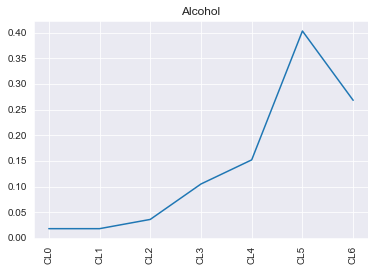

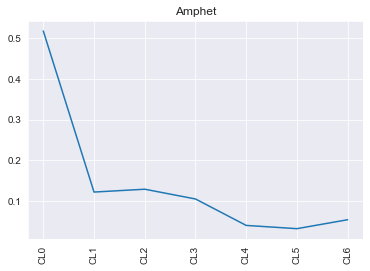

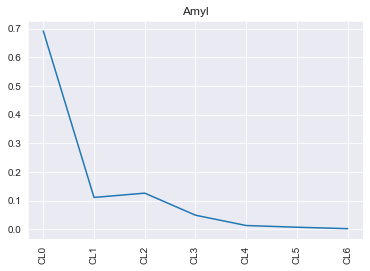

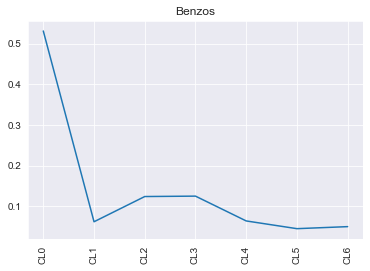

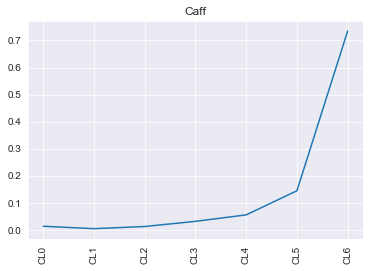

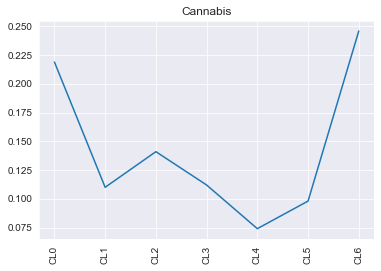

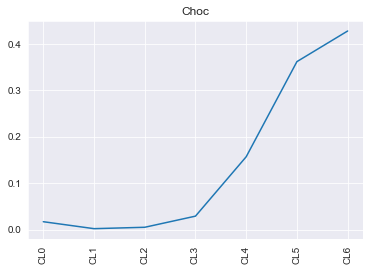

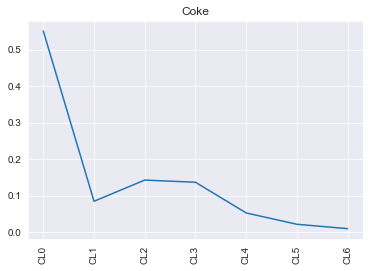

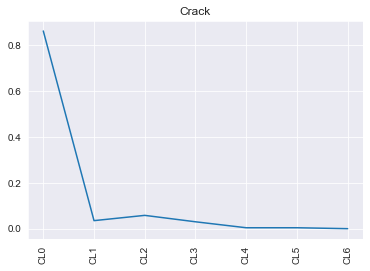

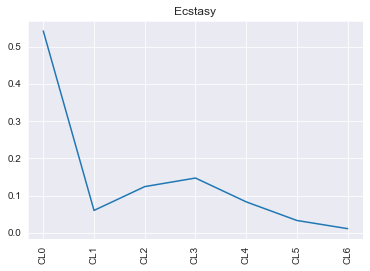

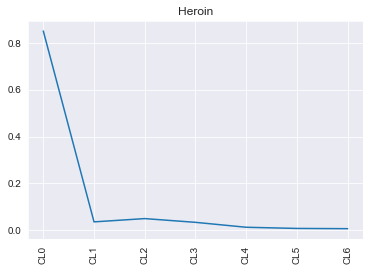

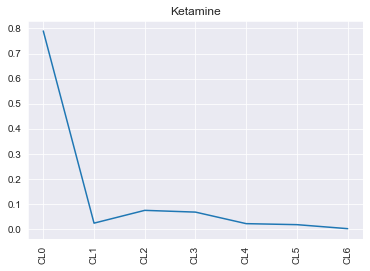

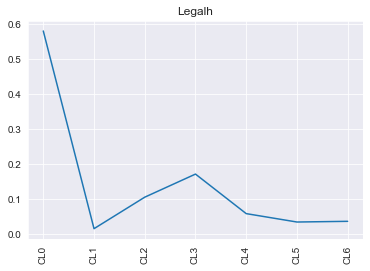

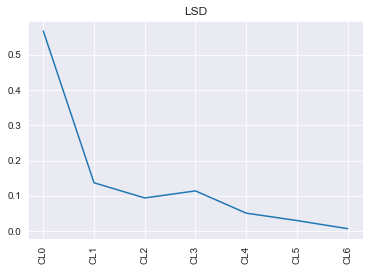

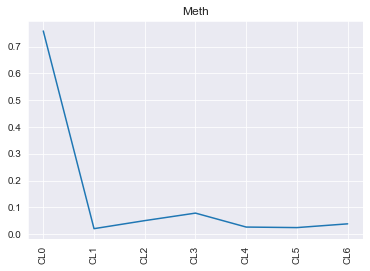

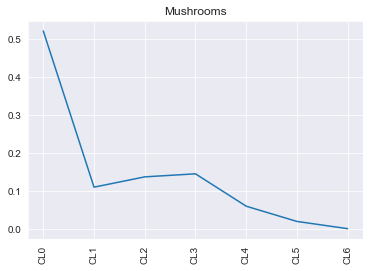

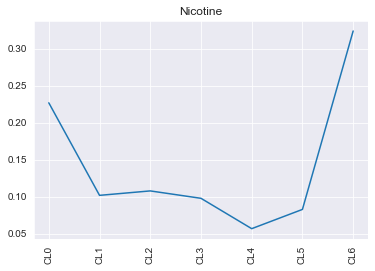

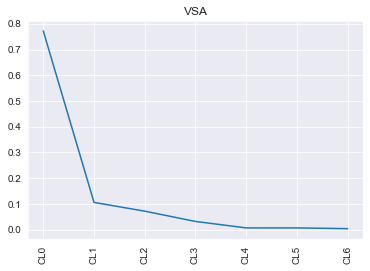

In [14]:
# Visualize the categories
for col in pct_usage_totals.columns:
    plt.plot(pct_usage_totals[col])
    plt.xticks(rotation=90)
    plt.title(col)
    plt.show()

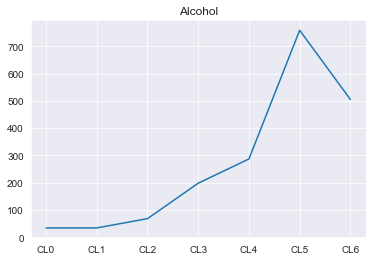

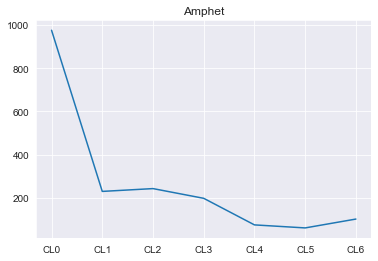

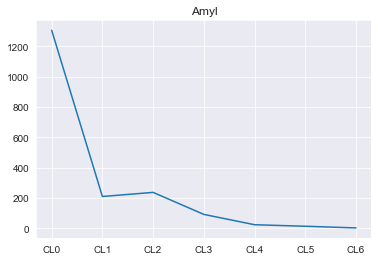

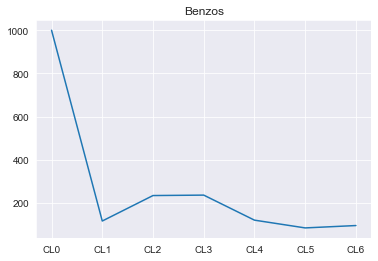

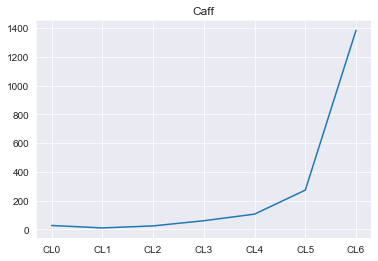

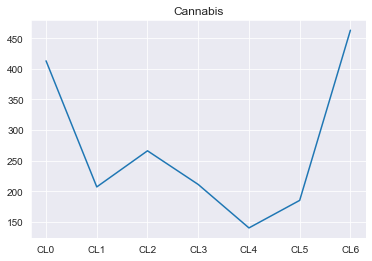

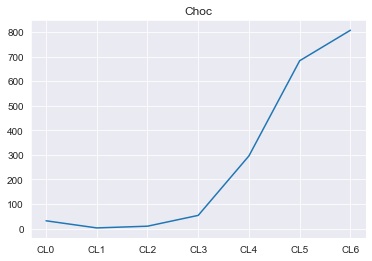

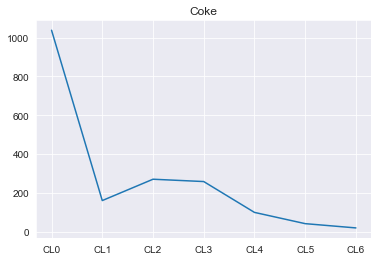

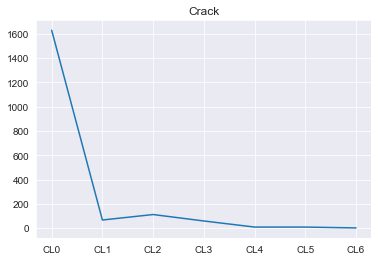

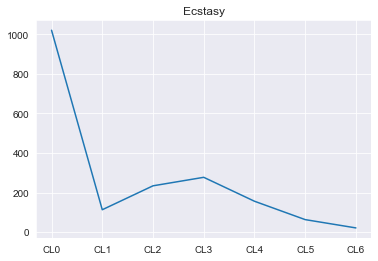

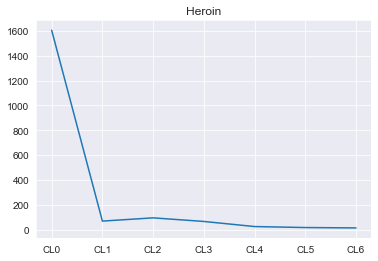

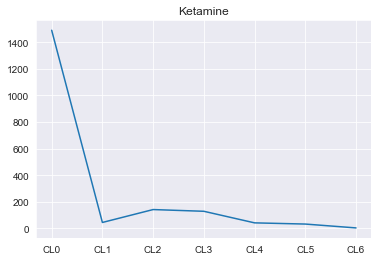

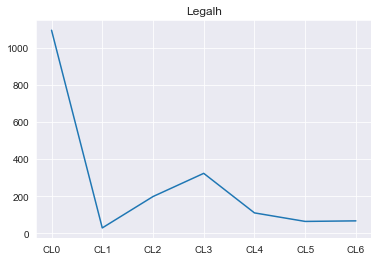

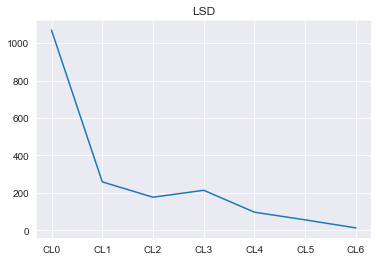

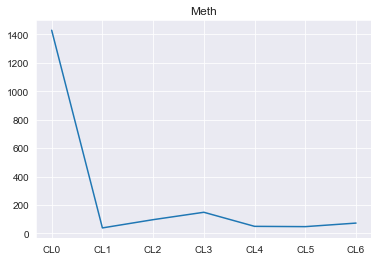

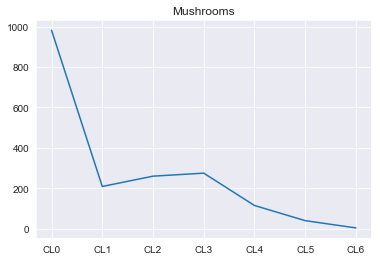

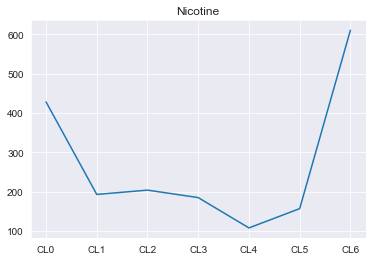

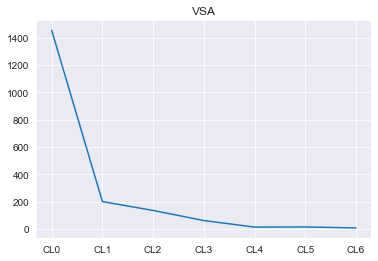

In [15]:
for col in count_df.columns:
    plt.plot(count_df[col])
    plt.title(col)
    plt.show()

In [16]:
count_df

Alcohol  Amphet  Amyl  Benzos  Caff  Cannabis  Choc  Coke  Crack  \
CL0       34     976  1305    1000    27       413    32  1038   1627   
CL1       34     230   210     116    10       207     3   160     67   
CL2       68     243   237     234    24       266    10   270    112   
CL3      198     198    92     236    60       211    54   258     59   
CL4      287      75    24     120   106       140   296    99      9   
CL5      759      61    14      84   273       185   683    41      9   
CL6      505     102     3      95  1385       463   807    19      2   

     Ecstasy  Heroin  Ketamine  Legalh   LSD  Meth  Mushrooms  Nicotine   VSA  
CL0     1021    1605      1490    1094  1069  1429        982       428  1455  
CL1      113      68        45      29   259    39        209       193   200  
CL2      234      94       142     198   177    97        260       204   135  
CL3      277      65       129     323   214   149        275       185    61  
CL4      156      24        42     110    97    50        115       108    13  
CL5       63      16        33      64    56    48         40       157    14  
CL6       21      13         4      67    13    73          4       610     7

There are a lot of "never used" (CL0) respondents, a lot of "used recently" (CL6, CL5) respondents -- but only for certan drugs -- and an interesting bump in respondents who said they'd used in the past but no longer (CL2-CL4) for several drugs. I want to capture this information in my predictors, so I will make a three-way categorical split:

+ Non-user" = -1 (defined as never used)
+ "Former user" = 0 (defined as last used over a year ago)
+ "User" = 1 (defined as used within last year)

In [17]:
# Make drug user categories binary
# "Non-user" = -1 (defined as never used)
# "Former user" = 0 (defined as last used over a year ago)
# "User" = 1 (defined as used within last year)

# year cutoff: what's the distribution of user classes?
# chi squared test to compare categorical use of substances 

for col in ['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke',
             'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 
            'Mushrooms', 'Nicotine', 'Semer', 'VSA']:
    drugs[col] = drugs[col].apply(lambda x: -1 if x in ['CL0'] else 0 if x in ['CL1', 'CL2'] else 1)            

In [18]:
drugs.head()

ID      Age   Gender  Education  Country  Ethnicity   Nscore   Escore  \
0   1  0.49788  0.48246   -0.05921  0.96082    0.12600  0.31287 -0.57545   
1   2 -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886   
2   3  0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523   
3   4 -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615   
4   5  0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340   

    Oscore   Ascore  ...  Ecstasy  Heroin  Ketamine  Legalh  LSD  Meth  \
0 -0.58331 -0.91699  ...       -1      -1        -1      -1   -1    -1   
1  1.43533  0.76096  ...        1      -1         0      -1    0     1   
2 -0.84732 -1.62090  ...       -1      -1        -1      -1   -1    -1   
3 -0.01928  0.59042  ...       -1      -1         0      -1   -1    -1   
4 -0.45174 -0.30172  ...        0      -1        -1       0   -1    -1   

   Mushrooms  Nicotine  Semer  VSA  
0         -1         0     -1   -1  
1         -1         1     -1   -1  
2          0        -1     -1   -1  
3         -1         0     -1   -1  
4          0         0     -1   -1  

[5 rows x 32 columns]

In [19]:
drugs.isna().any()

ID           False
Age          False
Gender       False
Education    False
Country      False
Ethnicity    False
Nscore       False
Escore       False
Oscore       False
Ascore       False
Cscore       False
Impulsive    False
SS           False
Alcohol      False
Amphet       False
Amyl         False
Benzos       False
Caff         False
Cannabis     False
Choc         False
Coke         False
Crack        False
Ecstasy      False
Heroin       False
Ketamine     False
Legalh       False
LSD          False
Meth         False
Mushrooms    False
Nicotine     False
Semer        False
VSA          False
dtype: bool

In [20]:
# Drop ID and fake drug (there were only 8 respondents)
drugs.drop(['ID', 'Semer'], axis=1, inplace=True)

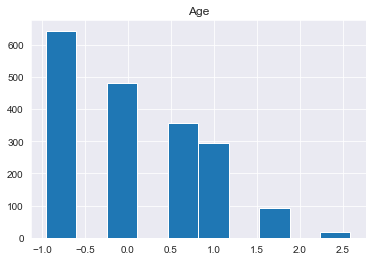

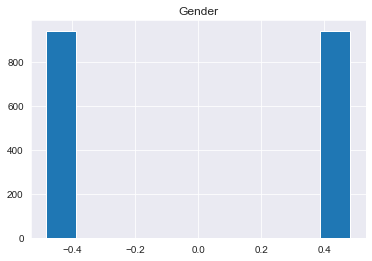

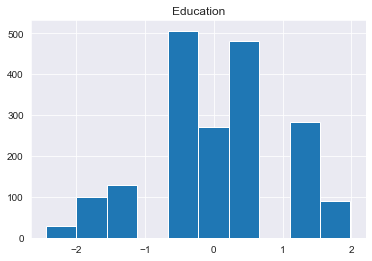

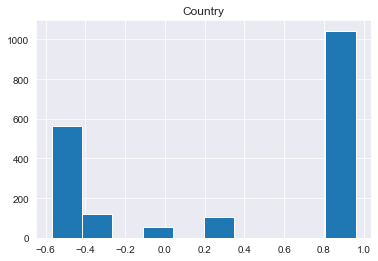

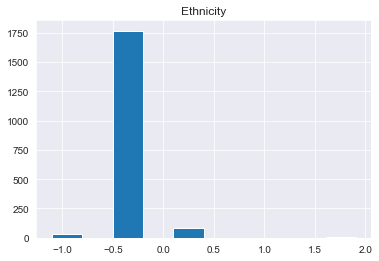

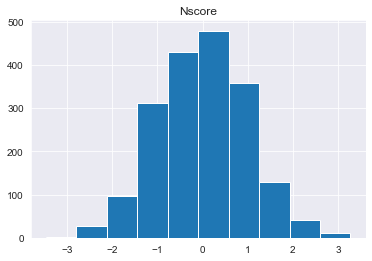

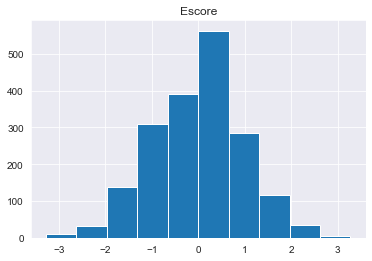

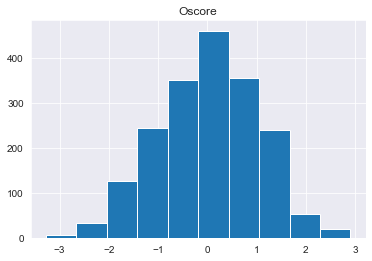

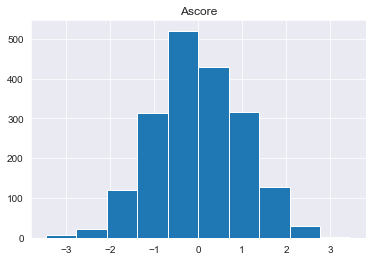

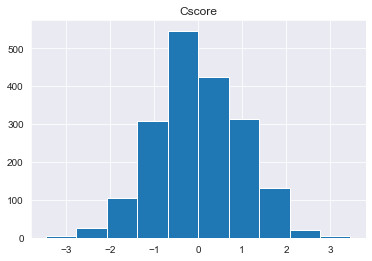

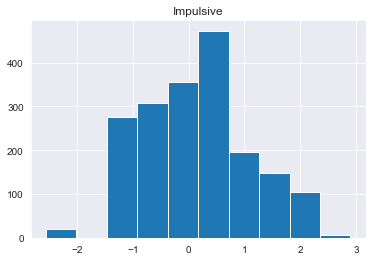

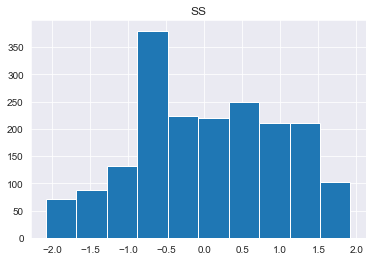

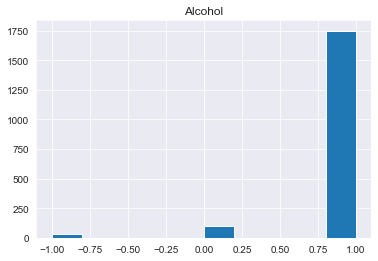

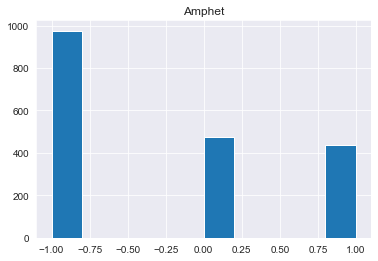

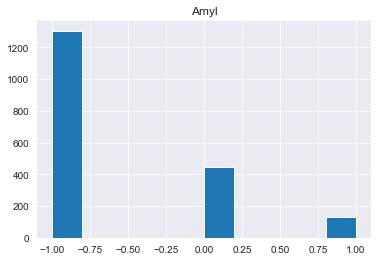

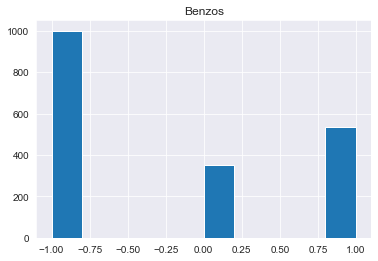

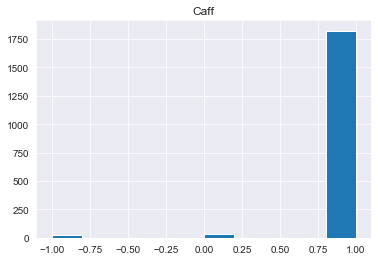

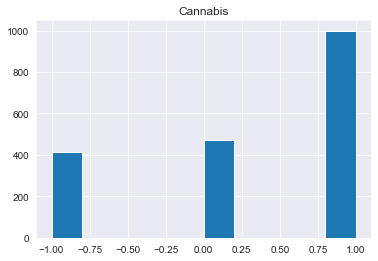

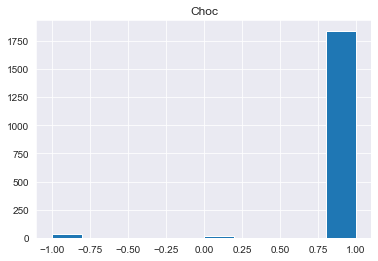

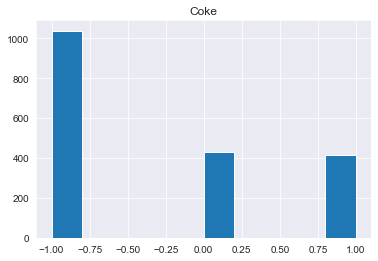

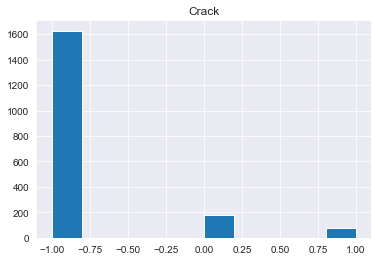

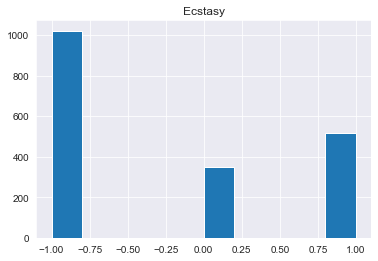

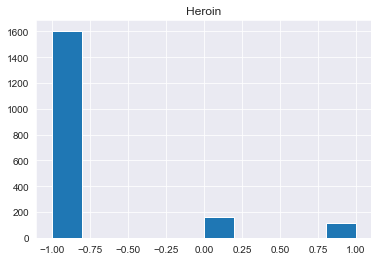

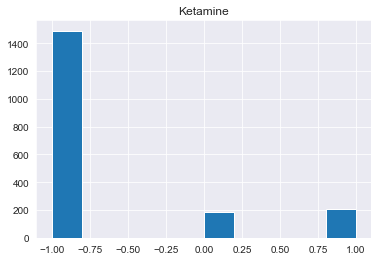

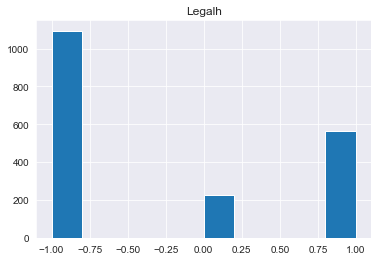

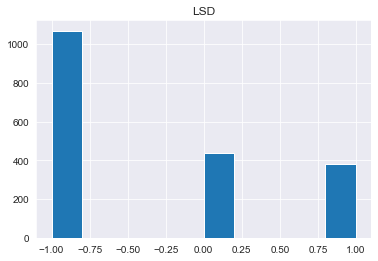

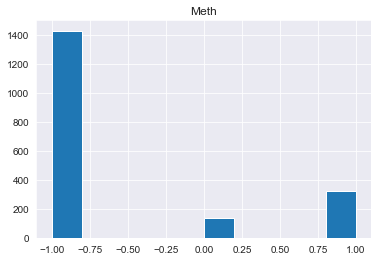

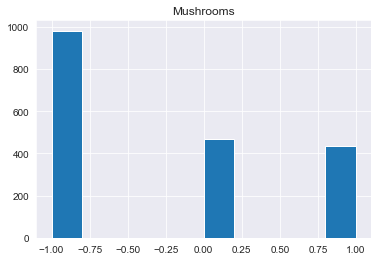

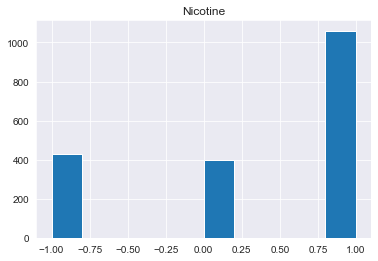

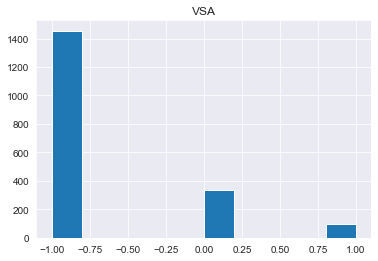

In [21]:
for col in drugs.columns:
    plt.hist(drugs[col])
    plt.title(col)
    plt.show()

In [22]:
# What type of relationship are we modeling between the variables? PREDICTION and INFERENCE
# Linear regression is prediction - how do you know how good the prediction is? 
## Errors: Metric of error (R2 - variance explained; F1 for categorization; ***RMSE!***)
# Inference is hypothesis testing
## Two types: correlation & causation 
## correlation (there is a link)
## causation (how can you actually tell if there's causal data in the set?)
### experimental design: double-blind controlled tests / manipulate your groups
### for INFERENCE, do not use random forests etc.; use the statistical modeling tools

In [23]:
subset = ['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke',
             'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 
                'Mushrooms', 'Nicotine', 'VSA', 'Nscore','Escore','Oscore','Ascore','Cscore','Impulsive','SS']
personality_df = drugs[subset]

In [24]:
#sns.pairplot(personality_df)

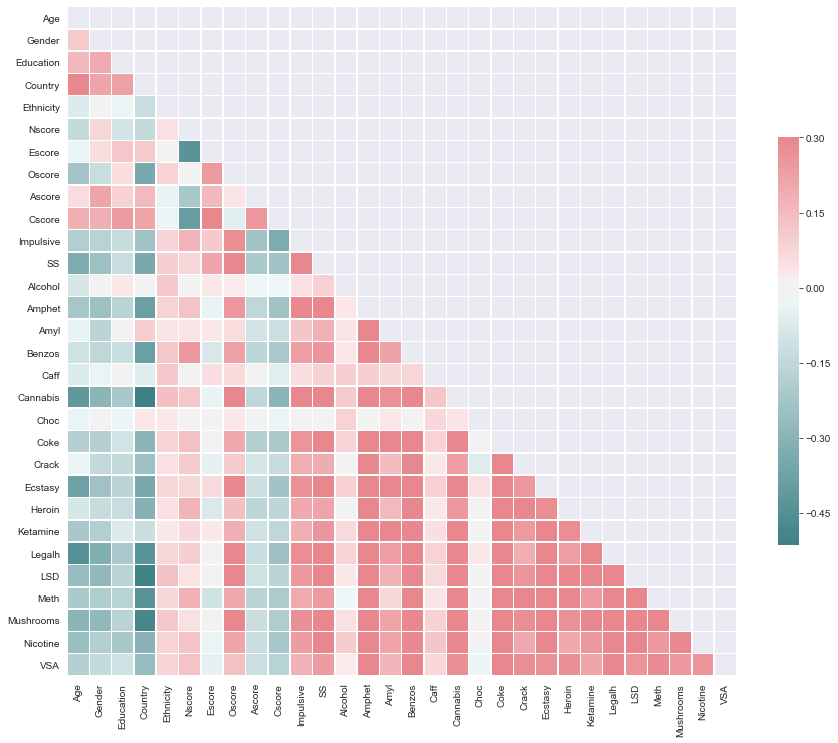

In [25]:
corr = drugs.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(200, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [26]:
age_dict = {'-0.95197': 'Age_18-24','-0.07854':'Age_25-34','0.49788':'Age_35-44','1.09449':'Age_45-54','1.82213':'Age_55-64','2.59171':'Age_65+'}
country_dict = {-0.09765:'Other',0.24923:'Other',-0.46841:'Other',-0.28519:'Other',0.21128:'Other',0.96082:'UK',-0.57009:'USA'}

In [27]:
drugs['Gender'] = drugs['Gender'].apply(lambda x: 'Female' if x > 0 else 'Male')
drugs['Age'] = drugs['Age'].round(decimals=5).map(str).map(age_dict)

# Create variable: college graduate versus non-college graduate
# Make binary
drugs['Education'] = drugs['Education'].apply(lambda x: 'Grad' if x > 0 else 'Non_Grad')

# Create country variable: UK, US, Other 
drugs['Country'] = drugs['Country'].round(decimals=5).map(country_dict)

# Create binary variable: White, Non-white
drugs['Ethnicity'] = drugs['Ethnicity'].map(lambda x: 'White' if round(x, 3) == -0.317 else 'Non_White') 

In [28]:
drugs.head()

Age  Gender Education Country  Ethnicity   Nscore   Escore   Oscore  \
0  Age_35-44  Female  Non_Grad      UK  Non_White  0.31287 -0.57545 -0.58331   
1  Age_25-34    Male      Grad      UK      White -0.67825  1.93886  1.43533   
2  Age_35-44    Male  Non_Grad      UK      White -0.46725  0.80523 -0.84732   
3  Age_18-24  Female      Grad      UK      White -0.14882 -0.80615 -0.01928   
4  Age_35-44  Female      Grad      UK      White  0.73545 -1.63340 -0.45174   

    Ascore   Cscore  ...  Crack  Ecstasy  Heroin  Ketamine  Legalh  LSD  Meth  \
0 -0.91699 -0.00665  ...     -1       -1      -1        -1      -1   -1    -1   
1  0.76096 -0.14277  ...     -1        1      -1         0      -1    0     1   
2 -1.62090 -1.01450  ...     -1       -1      -1        -1      -1   -1    -1   
3  0.59042  0.58489  ...     -1       -1      -1         0      -1   -1    -1   
4 -0.30172  1.30612  ...     -1        0      -1        -1       0   -1    -1   

   Mushrooms  Nicotine  VSA  
0         -1         0   -1  
1         -1         1   -1  
2          0        -1   -1  
3         -1         0   -1  
4          0         0   -1  

[5 rows x 30 columns]

In [29]:
# Get dummy variables for categorical predictors
age_dummies = pd.get_dummies(drugs.Age, prefix="Age", drop_first=True)
gender_dummies = pd.get_dummies(drugs.Gender, prefix="Gender", drop_first=True)
education_dummies = pd.get_dummies(drugs.Education, prefix="Education", drop_first=True)
country_dummies = pd.get_dummies(drugs.Country, prefix="Country", drop_first=True)
ethnicity_dummies = pd.get_dummies(drugs.Ethnicity, prefix="Ethnicity", drop_first=True)

In [30]:
drugs = pd.concat([drugs, age_dummies, gender_dummies, education_dummies, country_dummies, ethnicity_dummies], axis=1)
drugs.drop(['Age', 'Gender', 'Education', 'Country', 'Ethnicity'], axis=1, inplace=True)

In [31]:
drugs.head()

Nscore   Escore   Oscore   Ascore   Cscore  Impulsive       SS  Alcohol  \
0  0.31287 -0.57545 -0.58331 -0.91699 -0.00665   -0.21712 -1.18084        1   
1 -0.67825  1.93886  1.43533  0.76096 -0.14277   -0.71126 -0.21575        1   
2 -0.46725  0.80523 -0.84732 -1.62090 -1.01450   -1.37983  0.40148        1   
3 -0.14882 -0.80615 -0.01928  0.59042  0.58489   -1.37983 -1.18084        1   
4  0.73545 -1.63340 -0.45174 -0.30172  1.30612   -0.21712 -0.21575        1   

   Amphet  Amyl  ...  Age_Age_25-34  Age_Age_35-44  Age_Age_45-54  \
0       0    -1  ...              0              1              0   
1       0     0  ...              1              0              0   
2      -1    -1  ...              0              1              0   
3      -1    -1  ...              0              0              0   
4       0     0  ...              0              1              0   

   Age_Age_55-64  Age_Age_65+  Gender_Male  Education_Non_Grad  Country_UK  \
0              0            0            0                   1           1   
1              0            0            1                   0           1   
2              0            0            1                   1           1   
3              0            0            0                   0           1   
4              0            0            0                   0           1   

   Country_USA  Ethnicity_White  
0            0                0  
1            0                1  
2            0                1  
3            0                1  
4            0                1  

[5 rows x 35 columns]

## Scale and split

In [32]:
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 35 columns):
Nscore                1885 non-null float64
Escore                1885 non-null float64
Oscore                1885 non-null float64
Ascore                1885 non-null float64
Cscore                1885 non-null float64
Impulsive             1885 non-null float64
SS                    1885 non-null float64
Alcohol               1885 non-null int64
Amphet                1885 non-null int64
Amyl                  1885 non-null int64
Benzos                1885 non-null int64
Caff                  1885 non-null int64
Cannabis              1885 non-null int64
Choc                  1885 non-null int64
Coke                  1885 non-null int64
Crack                 1885 non-null int64
Ecstasy               1885 non-null int64
Heroin                1885 non-null int64
Ketamine              1885 non-null int64
Legalh                1885 non-null int64
LSD                   1885 non-null int

No. of COMBINATIONS (3 choose 4) (not permutations) to sum to:

* 4: one (1,1,1,1)
* 3: one (0,1,1,1)
* 2: two (0,0,1,1) (1,1,1,-1)
* 1: two (0,0,0,1) (1,1,-1,0)+
* 0: three (0,0,0,0) (0,0,1,-1) (-1,-1,1,1)
* -1: two (-1,0,0,0) (-1,-1,1,0)
* -2: two (0,0,-1,-1) (-1,-1,-1,1)
* -3: one (0,-1,-1,-1)
* -4: one (-1,-1,-1,-1)

In [33]:
# create target variable
# users of these 4 drugs _within the past YEAR_

target = ['Crack', 'Coke', 'Heroin', 'Meth']
target_df = drugs[target].copy()

# Set columns = 1 if used, 0 if never
for col in target:
    target_df[col] = target_df[col].map(lambda x: 0 if x <= 0 else 1)

# Set Target column to True if any target drug used, False if not 
target_df['Target'] = target_df.any(axis=1)

# Replace bool with number
target_df['Target'] = target_df['Target'].map(lambda x: 1 if x == True else 0)

In [34]:
# create dummy variables for remaining drugs
drug_dummy_cols = ['Alcohol','Amphet','Amyl','Benzos',
                   'Caff','Cannabis','Choc','Ecstasy',
                   'Ketamine','Legalh','LSD','Mushrooms',
                   'Nicotine','VSA']
for col in drug_dummy_cols:
    dummies = pd.get_dummies(drugs[col], prefix=col, drop_first=True)
    drugs = pd.concat([drugs, dummies], axis=1)
    drugs.drop(col, axis=1, inplace=True)

In [65]:
from sklearn.model_selection import train_test_split

target = ['Crack', 'Coke', 'Heroin', 'Meth']
X_drugs = drugs.drop(target, axis=1)
y_drugs = target_df['Target'] 

X_train, X_test, y_train, y_test = train_test_split(X_drugs, y_drugs, random_state=42)

In [66]:
# MinMaxScaler Nscore ... SS

from sklearn.preprocessing import MinMaxScaler

mscaler = MinMaxScaler()
transformed = mscaler.fit_transform(X_train)
X_train = pd.DataFrame(transformed, columns = X_train.columns)

In [67]:
# chi square test for categorical predictors

from scipy.stats import chi2_contingency
from scipy.stats import chi2

stat, p, dof, expected = chi2_contingency(X_train)
print(expected)

[[0.48774105 0.50162562 0.5269392  ... 0.55988265 0.17981118 0.04653936]
 [0.44508906 0.45775945 0.48085941 ... 0.51092202 0.16408705 0.04246959]
 [0.50726767 0.5217081  0.54803511 ... 0.58229744 0.18700988 0.04840256]
 ...
 [0.65283594 0.67142028 0.70530222 ... 0.74939666 0.24067525 0.06229242]
 [0.50795012 0.52240998 0.5487724  ... 0.58308084 0.18726148 0.04846768]
 [0.63703349 0.65516798 0.68822978 ... 0.73125688 0.2348495  0.06078458]]


In [68]:
# interpret test statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print(f'Test statistic: {round(stat)}: Dependent (reject H0)')
else:
    print(f'Test statistic: {round(stat)}: Independent (fail to reject H0)')

Test statistic: 36081.0: Independent (fail to reject H0)


In [69]:
# interpret p-value
alpha = 1.0 - prob
if p <= alpha:
    print(f'p value: {p}: Dependent (reject H0)')
else:
    print(f'p value: {p}: Independent (fail to reject H0)')

p value: 1.0: Independent (fail to reject H0)


In [70]:
X_train

Nscore    Escore    Oscore    Ascore    Cscore  Impulsive        SS  \
0     0.682906  0.454133  0.673143  0.563290  0.499040   0.503573  0.539559   
1     0.267175  0.670141  0.624600  0.412490  0.387201   0.629735  0.619957   
2     0.777023  0.230828  0.730990  0.344801  0.537457   0.503573  0.388117   
3     0.777023  0.311882  0.602341  0.390173  0.300104   0.503573  0.224398   
4     0.436828  0.500507  0.456995  0.541542  0.517797   0.215401  0.388117   
5     0.497556  0.500507  0.258003  0.497505  0.537457   0.215401  0.132468   
6     0.418284  0.476348  0.577652  0.585213  0.635594   0.503573  0.308011   
7     0.512092  0.597404  0.624600  0.456454  0.584415   0.428474  0.308011   
8     0.327193  0.796106  0.730990  0.518959  0.584415   0.565343  0.619957   
9     0.821664  0.289795  0.835399  0.609827  0.353580   0.503573  0.224398   
10    0.347724  0.597404  0.501355  0.306185  0.537457   0.629735  0.619957   
11    0.347724  0.412116  0.478690  0.477648  0.353580   0.428474  0.465658   
12    0.327193  0.892967  0.624600  0.286461  0.441431   0.428474  0.825752   
13    0.525755  0.646992  0.553046  0.367654  0.584415   0.428474  0.710933   
14    0.418284  0.622976  0.878817  0.609827  0.460156   0.215401  0.308011   
15    0.525755  0.476348  0.527023  0.541542  0.460156   0.337920  0.619957   
16    0.400727  0.572721  0.258003  0.477648  0.635594   0.215401  0.308011   
17    0.649721  0.177090  0.501355  0.563290  0.499040   0.215401  0.308011   
18    0.436828  0.549172  0.527023  0.518959  0.560031   0.503573  0.539559   
19    0.572001  0.696415  0.501355  0.585213  0.795157   0.629735  0.825752   
20    0.512092  0.500507  0.323599  0.390173  0.584415   0.565343  0.465658   
21    0.347724  0.311882  0.501355  0.390173  0.517797   0.428474  0.465658   
22    0.497556  0.500507  0.926716  0.412490  0.185210   0.629735  0.825752   
23    0.722862  0.525607  0.673143  0.497505  0.584415   0.565343  0.710933   
24    0.385475  0.597404  0.553046  0.477648  0.423875   0.705068  0.825752   
25    0.588844  0.454133  0.435690  0.325057  0.710993   0.337920  0.825752   
26    0.649721  0.206510  0.456995  0.497505  0.560031   0.337920  0.000000   
27    0.512092  0.500507  0.456995  0.390173  0.609443   0.503573  0.465658   
28    0.588844  0.376883  0.501355  0.306185  0.479394   0.629735  0.539559   
29    0.632577  0.432804  0.299519  0.609827  0.405822   0.215401  0.388117   
...        ...       ...       ...       ...       ...        ...       ...   
1383  0.452610  0.742044  0.527023  0.325057  0.795157   0.428474  0.710933   
1384  0.555725  0.597404  0.478690  0.367654  0.499040   0.503573  0.710933   
1385  0.172107  0.572721  0.348943  0.732522  0.584415   0.337920  0.388117   
1386  0.649721  0.622976  0.702175  0.344801  0.423875   0.629735  0.825752   
1387  0.467796  0.500507  0.392939  0.609827  0.560031   0.215401  0.224398   
1388  0.497556  0.250544  0.835399  0.367654  0.517797   0.503573  0.619957   
1389  0.200229  0.525607  0.762567  0.762481  0.663677   0.337920  0.308011   
1390  0.682906  0.289795  0.456995  0.412490  0.242854   0.503573  0.619957   
1391  0.682906  0.311882  0.602341  0.367654  0.499040   0.337920  0.539559   
1392  0.512092  0.646992  0.798385  0.563290  0.460156   0.565343  0.539559   
1393  0.632577  0.549172  0.299519  0.563290  0.836768   0.337920  0.224398   
1394  0.799486  0.230828  0.553046  0.709330  0.370263   0.503573  0.388117   
1395  0.722862  0.230828  0.553046  0.390173  0.150272   0.337920  0.000000   
1396  0.704420  0.289795  0.456995  0.477648  0.167460   0.428474  0.465658   
1397  0.619312  0.376883  0.435690  0.434590  0.460156   0.337920  0.388117   
1398  0.347724  0.525607  0.456995  0.456454  0.537457   0.337920  0.619957   
1399  0.327193  0.722089  0.392939  0.635892  0.584415   0.337920  0.388117   
1400  0.418284  0.432804  0.278311  0.635892  0.609443   0.215401  0.132468   
1401  0.649721  0.289795  0.456995  0.477648  0.370263   0

# Modeling

### 1. Multinomial Bayes

In [71]:
# classification
from sklearn.naive_bayes import MultinomialNB
Xnb = X_train.to_numpy(copy=True)
ynb = y_train.to_numpy(copy=True)
NBmodel = MultinomialNB()
NBmodel.fit(Xnb, ynb)
y_model = NBmodel.predict(Xnb)

In [72]:
# baseline accuracy
from sklearn.metrics import accuracy_score
round(accuracy_score(ynb, y_model), 4)

0.8011

In [73]:
# cross validation
# sklearn.model_selection.cross_val_score(estimator, X, y=None, groups=None, scoring=None, cv=’warn’, n_jobs=None, verbose=0, fit_params=None, pre_dispatch=‘2*n_jobs’, error_score=’raise-deprecating’)

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

print(cross_val_score(NBmodel, Xnb, ynb, cv=5))

#alt: from scratch
#skfolds = StratifiedKFold(n_splits=3, random_state=42)
#
#for train_index, test_index in skfolds.split(X_train, y_train):
#    clone_NBmodel = clone(NBmodel)
#    X_train_folds = X_train[train_index]
#    y_train_folds = y_train[train_index]
#    X_test_fold = X_train[test_index]
#    y_test_fold = y_train[test_index]
#
#    clone_clf.fit(X_train_folds, y_train_folds)
#    y_pred = clone_clf.predict(X_test_fold)
#    n_correct = sum(y_pred == y_test_fold)
#    print(n_correct / len(y_pred)) 

[0.79577465 0.83745583 0.76241135 0.81205674 0.78723404]


## 2. Logistic Regression

In [74]:
# Logistic regression
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

lr = LogisticRegression(penalty='l2', solver='saga', multi_class='multinomial')
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_train)

def print_report(y_train, y_pred):

    print('LOGISTIC REGRESSION')
    print('--'*40)
    print('Confusion Matrix')
    print('--'*40)
    print(confusion_matrix(y_train, y_pred))
    print('--'*40)
    print('Classification Report')
    print('--'*40)
    print(classification_report(y_train, y_pred, output_dict= False))
    print('--'*40)
    p0t2= round(f1_score(y_train, y_pred), 3)
    print(f'F1 score: {p0t2}')

print_report(y_train, y_pred_lr)

LOGISTIC REGRESSION
--------------------------------------------------------------------------------
Confusion Matrix
--------------------------------------------------------------------------------
[[871 101]
 [135 306]]
--------------------------------------------------------------------------------
Classification Report
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       972
           1       0.75      0.69      0.72       441

    accuracy                           0.83      1413
   macro avg       0.81      0.79      0.80      1413
weighted avg       0.83      0.83      0.83      1413

--------------------------------------------------------------------------------
F1 score: 0.722


In [75]:
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_pred_lr))
print('Train Root Mean Squared Error:' , train_rmse)

y_test_pred = lr.predict(X_test)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print('Test Root Mean Squared Error: ' + str(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))))

Train Root Mean Squared Error: 0.4086814452705454
Test Root Mean Squared Error: 0.5387524823962629


In [76]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

lr = LogisticRegression(penalty='l2', solver='lbfgs', class_weight='balanced', multi_class='multinomial')
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_train)

print_report(y_train, y_pred_lr)

train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_pred_lr))
print('Train Root Mean Squared Error:' , train_rmse)

y_test_pred = lr.predict(X_test)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
print('Test Root Mean Squared Error: ' + str(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))))

LOGISTIC REGRESSION
--------------------------------------------------------------------------------
Confusion Matrix
--------------------------------------------------------------------------------
[[790 182]
 [ 76 365]]
--------------------------------------------------------------------------------
Classification Report
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.81      0.86       972
           1       0.67      0.83      0.74       441

    accuracy                           0.82      1413
   macro avg       0.79      0.82      0.80      1413
weighted avg       0.84      0.82      0.82      1413

--------------------------------------------------------------------------------
F1 score: 0.739
Train Root Mean Squared Error: 0.4273057845918395
Test Root Mean Squared Error: 0.5894553648230239


In [77]:
lr.coef_

array([[-0.2490347 , -0.16730354, -0.27965386, -0.7444502 , -0.05535642,
         0.23330401, -0.11752202,  0.15241645, -0.10989537, -0.28877673,
        -0.11781279,  0.1395852 ,  0.01864172,  0.06851493, -0.21089274,
         0.10041433, -0.02173073, -0.1770569 , -0.15234813,  0.27446523,
         0.55267452,  0.06046083,  0.02893368,  0.18846142,  0.6043402 ,
        -1.03466449, -0.54065237,  0.05153359,  0.44931691, -0.44920852,
        -0.06431665,  0.25436413,  0.68653315,  0.13964408,  0.40087871,
         0.06033687,  0.34396733, -0.02713104, -0.15673948, -0.09210298,
        -0.02067967,  0.23077397,  0.16700351,  0.11588354,  0.15736926]])

## 3. KNN

In [78]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')


In [79]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [80]:
# make class predictions for the testing set
y_train_pred = knn.predict(X_train)
y_pred_class = knn.predict(X_test)

In [81]:
# calculate accuracy
print(f'Accuracy: {round(metrics.accuracy_score(y_test, y_pred_class), 4)}')
print(f'F1:  {round(metrics.f1_score(y_test, y_pred_class), 4)}')
train_rmse = round(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)), 3)
print('Training RMSE: ', train_rmse)
test_rmse = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_class)), 3)
print('Test RMSE:' , test_rmse)

Accuracy: 0.8453
F1:  0.7245
Training RMSE:  0.403
Test RMSE: 0.393


In [82]:
import matplotlib.pyplot as plt
import itertools
import numpy as np
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, (no normalization)')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix, (no normalization)
[[303  25]
 [ 48  96]]


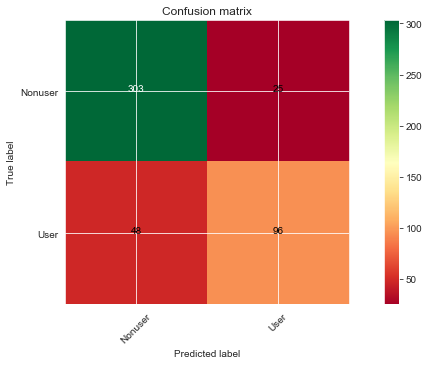

In [83]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_class)
classes = ['Nonuser', 'User']
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.RdYlGn)

In [84]:
#create a container to track the scores
k_scores=[]
f1_scores=[]

#set up a loop to fit the model using a different values of K

k_range = list(range(1, 20, 1))
for k in k_range:
    
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #fit the model and get the score on a evaluation metric
    knn.fit(X_train, y_train)
    
    y_pred_class = knn.predict(X_test)
    
    k_scores.append({'Accuracy': metrics.accuracy_score(y_test, y_pred_class), 'F1': metrics.f1_score(y_test, y_pred_class)})
    f1_scores.append(metrics.f1_score(y_test,y_pred_class))
print(k_scores)
# Print out the scores to see which one is best. 

[{'Accuracy': 0.7627118644067796, 'F1': 0.6190476190476191}, {'Accuracy': 0.7860169491525424, 'F1': 0.5550660792951542}, {'Accuracy': 0.815677966101695, 'F1': 0.6903914590747332}, {'Accuracy': 0.8135593220338984, 'F1': 0.6363636363636364}, {'Accuracy': 0.826271186440678, 'F1': 0.7007299270072994}, {'Accuracy': 0.826271186440678, 'F1': 0.6796875}, {'Accuracy': 0.8389830508474576, 'F1': 0.7246376811594203}, {'Accuracy': 0.8411016949152542, 'F1': 0.7126436781609194}, {'Accuracy': 0.8495762711864406, 'F1': 0.7436823104693141}, {'Accuracy': 0.8453389830508474, 'F1': 0.7245283018867925}, {'Accuracy': 0.8495762711864406, 'F1': 0.7418181818181818}, {'Accuracy': 0.8453389830508474, 'F1': 0.7265917602996255}, {'Accuracy': 0.8432203389830508, 'F1': 0.7338129496402879}, {'Accuracy': 0.8411016949152542, 'F1': 0.721189591078067}, {'Accuracy': 0.836864406779661, 'F1': 0.7220216606498194}, {'Accuracy': 0.836864406779661, 'F1': 0.7116104868913857}, {'Accuracy': 0.8347457627118644, 'F1': 0.7194244604316

In [85]:
acc = [x['Accuracy'] for x in k_scores]
f1 = [x['F1'] for x in k_scores]
print(f'Highest Accuracy: {max(acc)}\nHighest F1: {max(f1)}')

Highest Accuracy: 0.8495762711864406
Highest F1: 0.7436823104693141


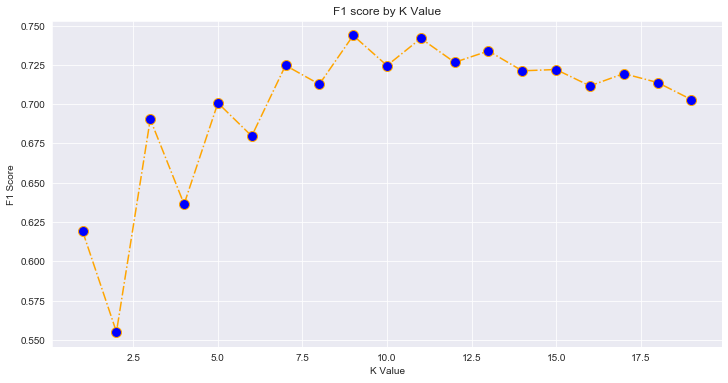

In [86]:
plt.figure(figsize=(12, 6))  
plt.plot(k_range, f1_scores, color='orange', linestyle='-.', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('F1 score by K Value')  
plt.xlabel('K Value')  
plt.ylabel('F1 Score') 
plt.show()

## 4. SVM (with Gridsearch)

In [87]:
# Grid search
from sklearn import svm
from sklearn.model_selection import GridSearchCV
svcmodel = svm.SVC()

In [94]:
parameter_candidates = [{'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.001, 0.0001], 
                         'decision_function_shape': ['ovr', 'ovo', None], 
                         'probability': [True, False], 'shrinking': [True, False]}]

In [95]:
clf = GridSearchCV(estimator=svm.SVC(), param_grid=parameter_candidates, n_jobs=-1)
clf.fit(X_train, y_train)   

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'decision_function_shape': ['ovr', 'ovo', None],
                          'gamma': [0.001, 0.0001], 'kernel': ['rbf'],
                          'probability': [True, False],
                          'shrinking': [True, False]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [96]:
print('Best score:', clf.best_score_) 
print('Best C:',clf.best_estimator_.C) 
print('Best Kernel:',clf.best_estimator_.kernel)
print('Best Gamma:',clf.best_estimator_.gamma)
print('Best Decision Function Shape:',clf.best_estimator_.decision_function_shape)
print('Best Degree:',clf.best_estimator_.degree)
print('Best Probability:',clf.best_estimator_.probability)
print('Best Shrinking',clf.best_estimator_.shrinking)

Best score: 0.8266100495399858
Best C: 100
Best Kernel: rbf
Best Gamma: 0.0001
Best Decision Function Shape: ovr
Best Degree: 3
Best Probability: True
Best Shrinking True


In [97]:
clf.score(X_train, y_train) 

0.8315640481245576

In [98]:
svm.SVC(C=100, kernel='rbf', gamma=0.0001, decision_function_shape='ovr').fit(X_test, y_test).score(X_test, y_test)



0.8601694915254238

In [115]:
accu = accuracy_score(y_test, svm.SVC(C=100, kernel='rbf', gamma=0.0001, decision_function_shape='ovr').fit(X_train, y_train).predict(X_test))

In [116]:
accu

0.8305084745762712

In [117]:
confusion_matrix(y_test, svm.SVC(C=100, kernel='rbf', gamma=0.0001, decision_function_shape='ovr').fit(X_train, y_train).predict(X_test))

array([[285,  43],
       [ 37, 107]])

## 5. Decision Tree / Random forest

In [90]:
# decision trees
from sklearn.tree import DecisionTreeClassifier
tree_reg0 = DecisionTreeClassifier(random_state=42, max_depth=4)
tree_reg0.fit(X_train, y_train)

tree_reg1 = DecisionTreeClassifier(random_state=42, max_depth=3)
tree_reg1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

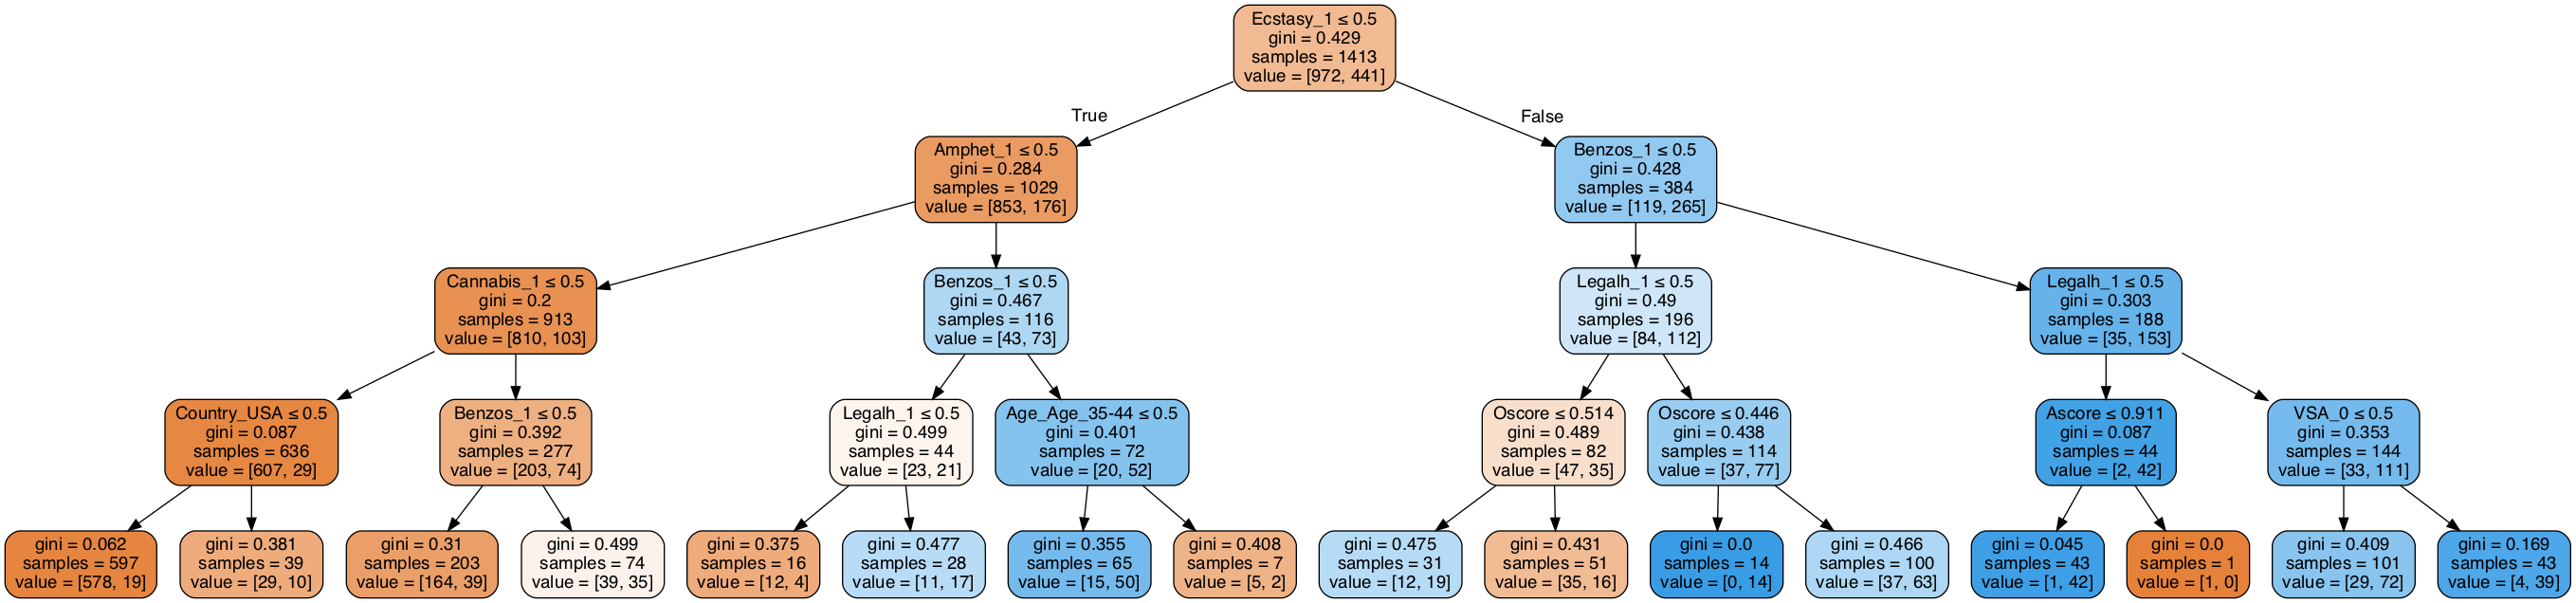

In [99]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(tree_reg0, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree_reg0.png')
Image(graph.create_png())

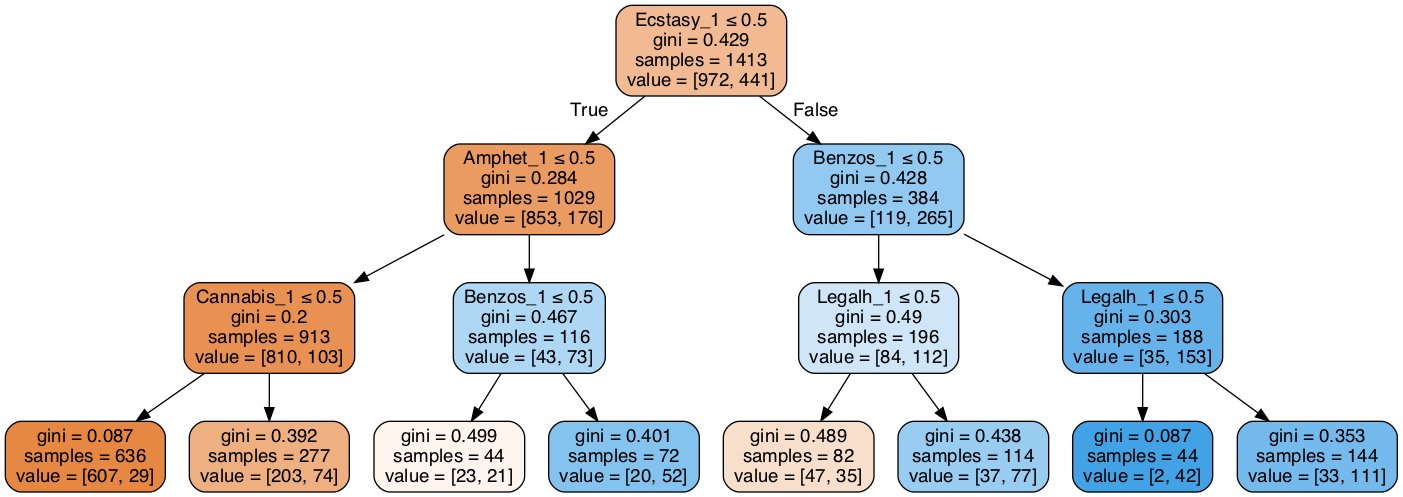

In [100]:
dot_data = StringIO()
export_graphviz(tree_reg1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree_reg1.png')
Image(graph.create_png())

In [102]:
# no restriction on depth
tree_reg2 = DecisionTreeClassifier(random_state=42)
tree_reg2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

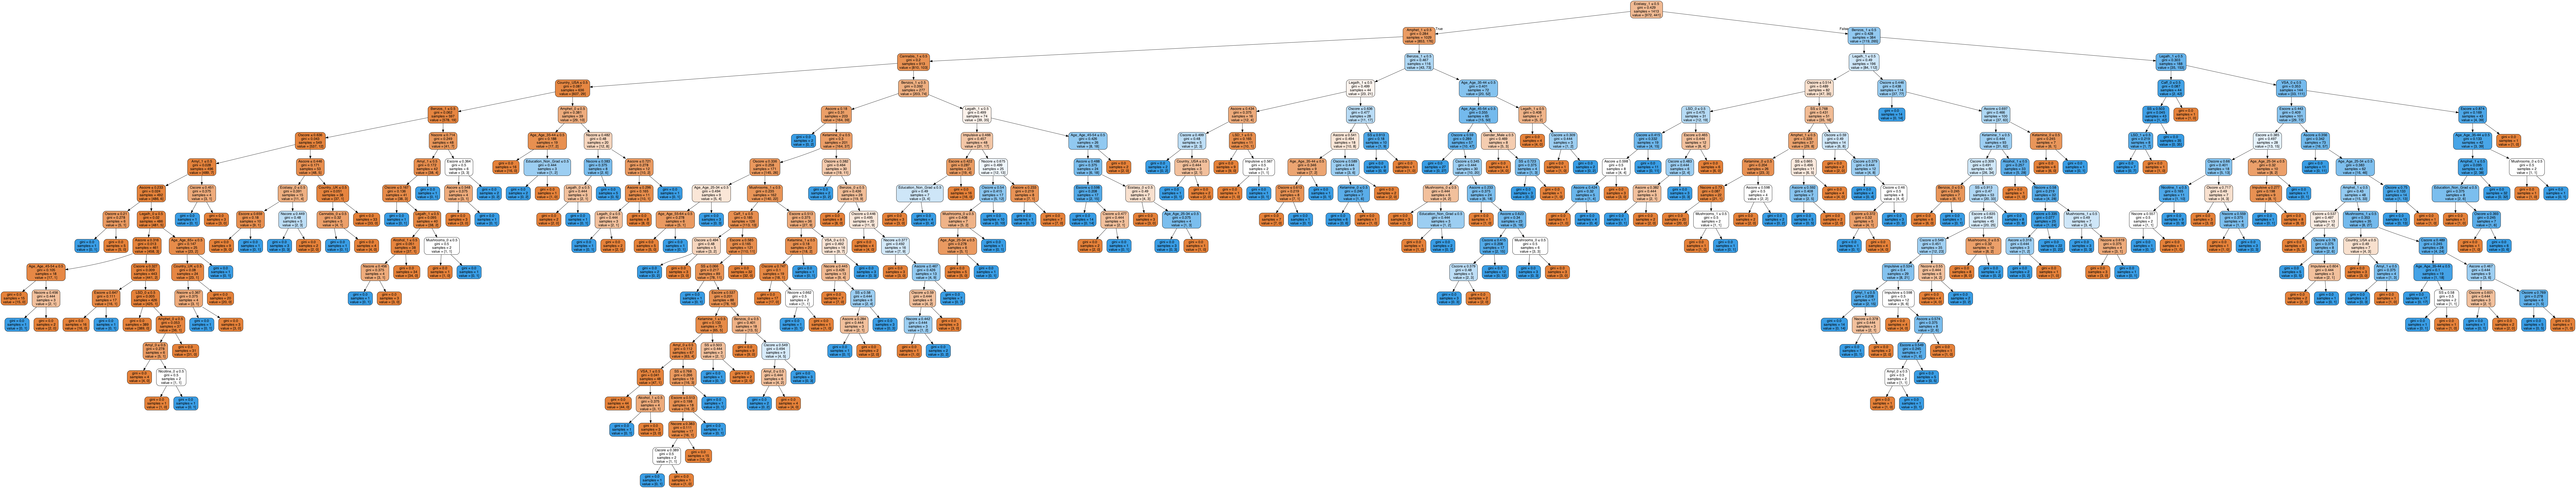

In [103]:
dot_data = StringIO()
export_graphviz(tree_reg2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree_reg2.png')
Image(graph.create_png())

In [104]:
tree_reg2.feature_importances_ 

array([0.05940509, 0.05852868, 0.08007569, 0.06757497, 0.04288856,
       0.01984016, 0.02977422, 0.01421805, 0.01356084, 0.00901259,
       0.00274698, 0.00290631, 0.00370843, 0.01216521, 0.00125928,
       0.01146289, 0.        , 0.        , 0.00565695, 0.00325044,
       0.09775755, 0.00798508, 0.0095957 , 0.01121816, 0.04032505,
       0.00307337, 0.00151215, 0.0026371 , 0.03122116, 0.        ,
       0.        , 0.00592564, 0.2483614 , 0.01183134, 0.00909319,
       0.00481738, 0.02802084, 0.00512573, 0.00423285, 0.01767488,
       0.01020715, 0.00164819, 0.00134852, 0.00759682, 0.00075542])

In [106]:
tree_reg2.get_params().keys()

dict_keys(['class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [107]:
# Tune hyperparameters with randomized search
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2', None]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Criterion
criterion = ['gini', 'entropy']
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'criterion' : criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2', None], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [108]:
from sklearn.ensemble import RandomForestClassifier
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   51.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.0min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [109]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 50,
 'criterion': 'gini',
 'bootstrap': False}

In [110]:
rfbest = RandomForestClassifier(n_estimators=800, min_samples_split=10, min_samples_leaf=4,max_features='sqrt',
                                max_depth=50,criterion='gini',bootstrap=False)
rfbest.fit(X_test, y_test).score(X_test, y_test)

0.9703389830508474

In [121]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print(f'Average Error: {np.mean(errors)}')
    
    return accuracy

base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
#base_y_pred = base_model.predict(y_train)
base_accuracy = evaluate(base_model, X_test, y_test)
#confusion_matrix(y_test, base_y_pred)

Model Performance
Average Error: 0.21398305084745764


In [131]:
accu = evaluate(best_random, X_train, y_train)

Model Performance
Average Error: 0.19037508846426043


In [124]:
best_random = rfbest
random_accuracy = evaluate(best_random, X_test, y_test)
#print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 0.03177966101694915
